In [19]:
import pandas as pd
import numpy as np
import sys
import pathlib
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Setup path
project_root = pathlib.Path().resolve().parent
sys.path.append(str(project_root / 'src'))

import util

# Load the train and test datasets
train_df, test_df = util.load_data('../data/train.csv', '../data/test.csv')

train_df.head()

Train shape: (2190, 13), Test shape: (730, 12)


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [21]:
# print duplicate rows
duplicates = train_df[train_df.duplicated()]

In [22]:
# print unique counts
print(train_df.nunique())

id               2190
day               365
pressure          236
maxtemp           219
temparature       198
mintemp           199
dewpoint          218
humidity           49
cloud              78
sunshine          120
winddirection      35
windspeed         223
rainfall            2
dtype: int64


In [23]:
# get nan counts
print(train_df.isnull().sum())

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


In [24]:
# Assuming util.py is properly imported
summary = util.summarize_dataframe(train_df)
summary.head(20)  # Show first 20 rows of the summary


,Column,Data Type,Non-Null Count,Null Count,Null %,Unique Count,Sample Unique,Min,Max,Mean,Std
0,id,int64,2190,0,0.0,2190,"[0, 1, 2, 3, 4]",0.0,2189.0,1094.500000,632.342866
1,day,int64,2190,0,0.0,365,"[1, 2, 3, 4, 5]",1.0,365.0,179.948402,105.203592
2,pressure,float64,2190,0,0.0,236,"[1017.4, 1019.5, 1024.1, 1013.4, 1021.8]",999.0,1034.6,1013.602146,5.655366
3,maxtemp,float64,2190,0,0.0,219,"[21.2, 16.2, 19.4, 18.1, 21.3]",10.4,36.0,26.365799,5.654330
4,temparature,float64,2190,0,0.0,198,"[20.6, 16.9, 16.1, 17.8, 18.4]",7.4,31.5,23.953059,5.222410
5,mintemp,float64,2190,0,0.0,199,"[19.9, 15.8, 14.6, 16.9, 15.2]",4.0,29.8,22.170091,5.059120
6,dewpoint,float64,2190,0,0.0,218,"[19.4, 15.4, 9.3, 16.8, 9.6]",-0.3,26.7,20.454566,5.288406
7,humidity,float64,2190,0,0.0,49,"[87.0, 95.0, 75.0, 52.0, 79.0]",39.0,98.0,82.036530,7.800654
8,cloud,float64,2190,0,0.0,78,"[88.0, 91.0, 47.0, 95.0, 45.0]",2.0,100.0,75.721918,18.026498
9,sunshine,float64,2190,0,0.0,120,"[1.1, 0.0, 8.3, 3.6, 7.6]",0.0,12.1,3.744429,3.626327


In [25]:
# Visualize missing data
util.plot_missing_data(train_df)


No missing data found!


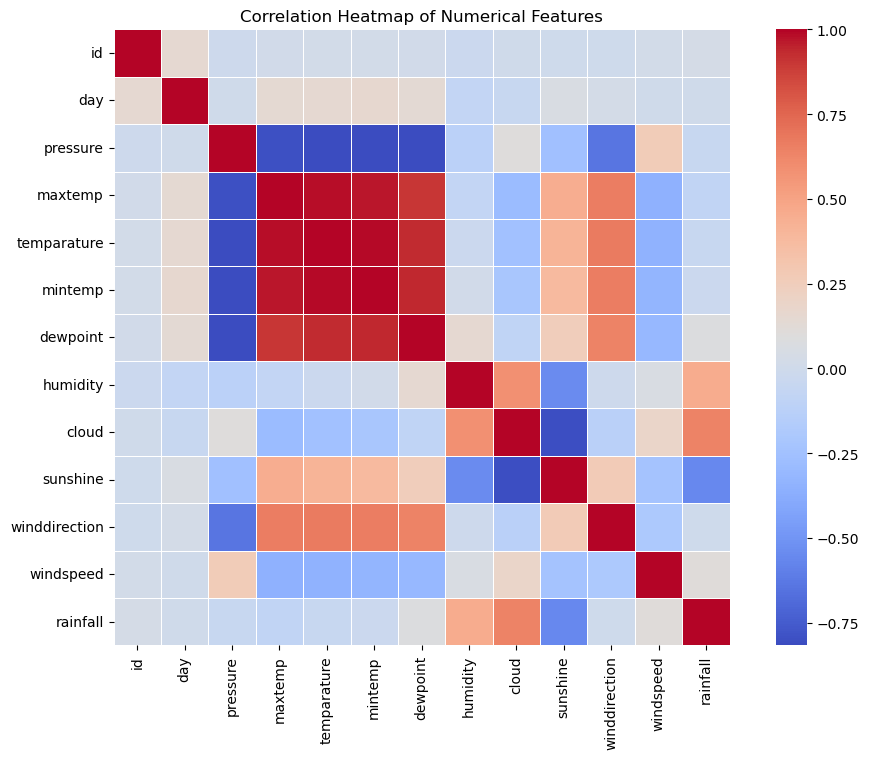

In [26]:
util.plot_correlation_heatmap(train_df)


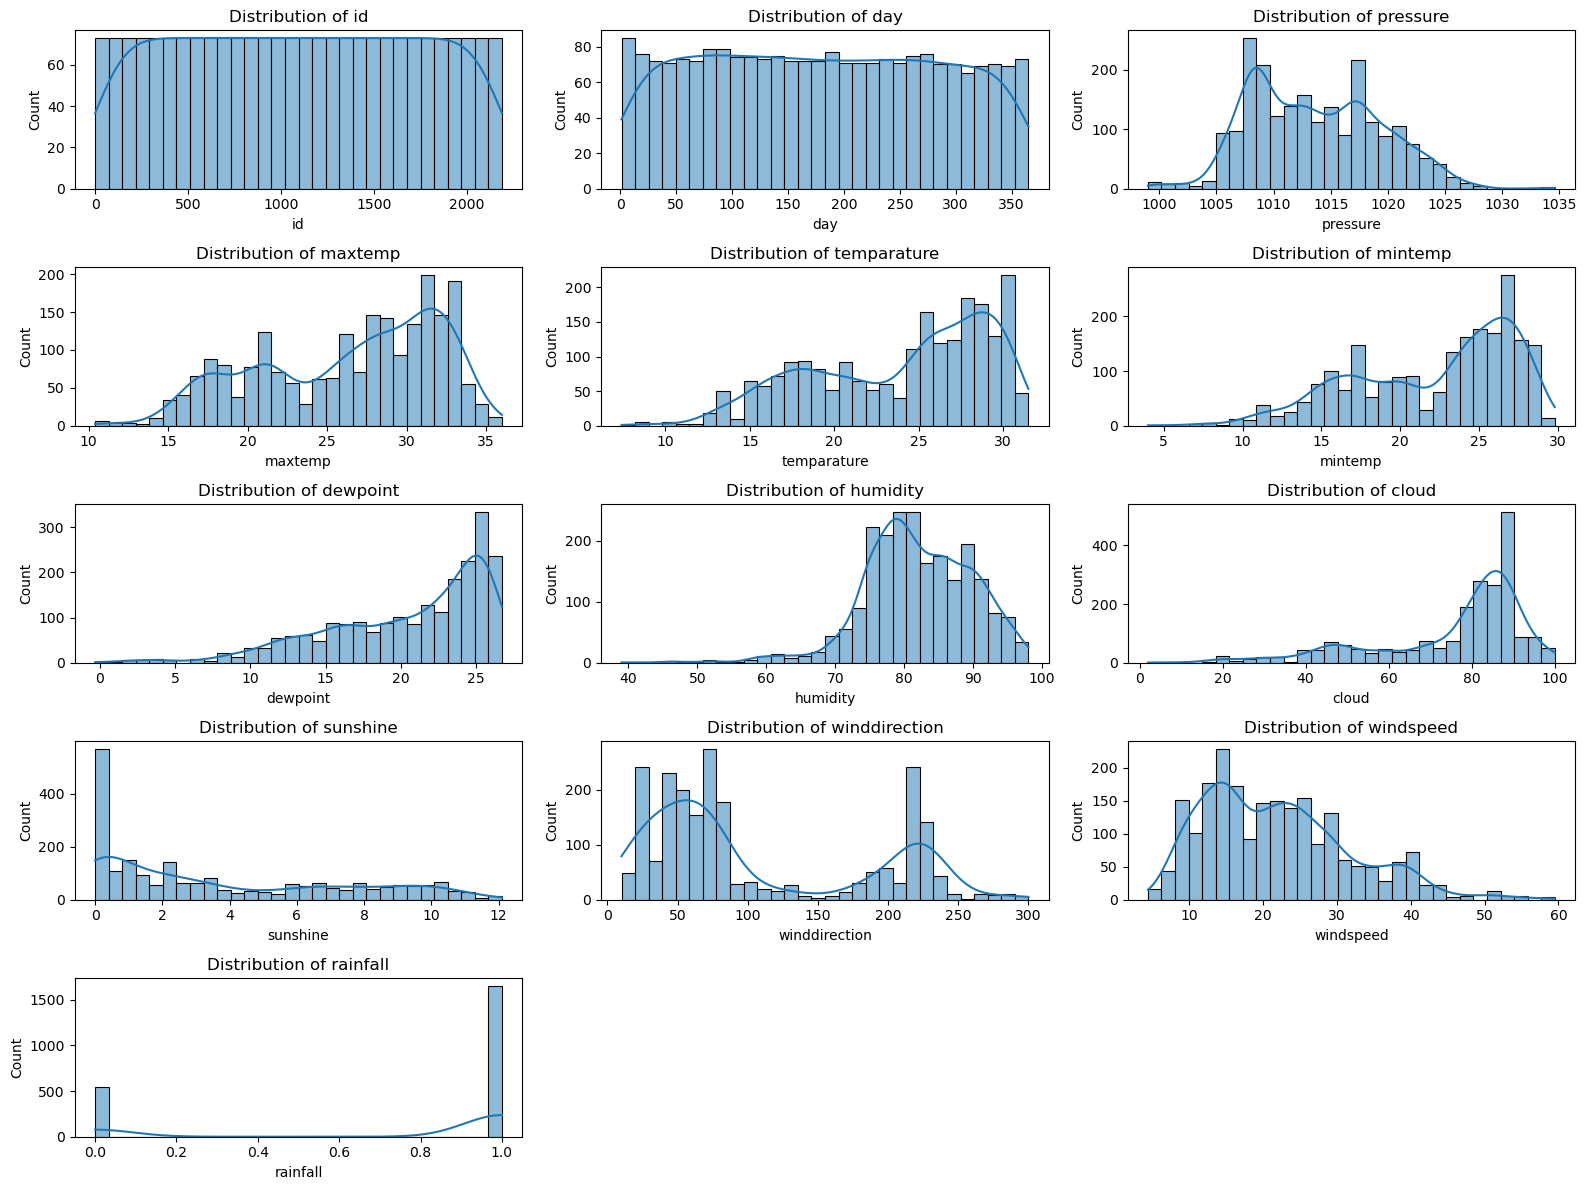

In [27]:
util.plot_numeric_distributions(train_df)


In [28]:
df_clean = util.remove_outliers_iqr(train_df)


In [29]:
df_clean, outliers = util.remove_outliers_iqr(train_df, return_outliers=True)
print("Outliers detected and removed:")
print(outliers.head())


Outliers detected and removed:
        id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
17      17   18    1034.6     17.5         16.2     14.1      11.8      68.0   
383    383   19    1034.6     11.2         10.4      7.0       3.4      77.0   
1828  1828    4    1032.3     17.3         17.3     16.7      16.6      73.0   
1840  1840   16    1034.6     10.4          8.7      7.0       2.4      46.0   
746    746   17    1021.5     12.5          8.5      4.7       2.0      75.0   

      cloud  sunshine  winddirection  windspeed  rainfall  
17     60.0       2.5           50.0       13.4         0  
383    95.0       0.0           40.0       16.0         1  
1828   83.0       0.0           30.0       19.3         1  
1840   19.0      10.0           20.0       34.3         0  
746    69.0       4.3           20.0       19.8         0  


In [30]:
# df_clean = util.remove_outliers_iqr(df, columns=['Age', 'Income'])


In [31]:
# Separate target and features from train
target = 'rainfall'  # <-- Target column name
train_y = train_df[target]  # Save target
train_X = train_df.drop(columns=[target])  # Drop target to get features

# Now train_X and test_df are both "features only"
# We can preprocess them together now
train_X, test_X = util.preprocess_train_test(train_X, test_df)

In [32]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')  # Solver can be adjusted depending on size


In [ ]:
# Train model on full train data
model.fit(train_X, train_y)

# Predict on test set
test_preds = util.predict_test(model, test_X, features=train_X.columns.tolist())

# Write submission (make sure to adjust ID column and submission format)
util.write_submission(test_df, test_preds, id_column='Id', output_path='submission.csv', prediction_column='rainfall')





Submission file written to: submission.csv
